<a href="https://colab.research.google.com/github/fendy07/rockpaperscissors-classification/blob/master/DeepLearning_PaperRockScissors_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Library**

Input library yang dibutuhkan dalam load dataset seperti gambar dalam folder, data gambar dll.

In [0]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import itertools
import split_folders
import zipfile,os
import cv2

## **2. Import Library Model Deep Learning**

Masukan library model Deep Learning yang dibutuhkan seperti TensorFlow, Keras maupun metode lainnya yang dipilih. Kemudian, masukan layer, model, praproses gambar, dan optimasi pada metode CNN atau **Convolutional Neural Network**.

In [0]:
# import deep learning library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

print(tf.__version__)

2.2.0


## **3. Load Image Data**
Ambil dataset yang telah disiapkan dengan link format **`.zip`** lalu ambil dengan cara **`!wget`** untuk mendapatkan dataset yang kemudian diunduh lalu di ekstrak data tersebut. 

In [0]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-06-01 15:54:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.54MB/s    in 56s     

2020-06-01 15:55:47 (5.46 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## **4. Pisahkan Data**

Setelah ekstraksi dataset dari file **`.zip`**. Langkah selanjutnya adalah pisahkan data menjadi 2 bagian yaitu data train dan data validasi dengan rasio 80:20. 

In [0]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/", seed=1337, ratio=(.7, .3))
split_folders.fixed('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/", seed=1337, fixed=(100, 100), oversample=False) 

data_dir = '/tmp/rockpaperscissors/'
training_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/rock'))) 
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))

os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

Copying files: 2188 files [00:02, 1078.90 files/s]
Copying files: 2188 files [00:03, 617.06 files/s]

712
726
750


['rock', 'paper', 'scissors']

In [0]:
training_paper_dir = os.path.join(training_dir, 'paper')
training_rock_dir = os.path.join(training_dir, 'rock')
training_scissors_dir = os.path.join(training_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [0]:
paper_imgs = os.listdir(training_paper_dir)
rock_imgs = os.listdir(training_rock_dir)
scissors_imgs = os.listdir(training_scissors_dir)

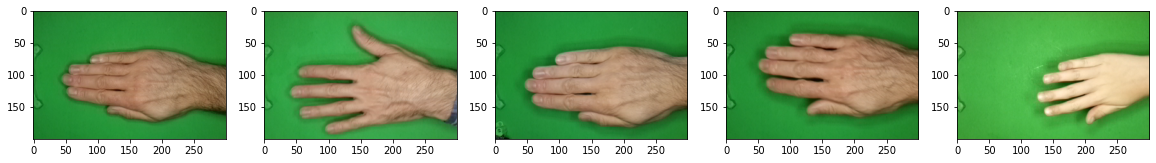

In [0]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_paper_dir, img_path))
    plt.imshow(img)
plt.show()

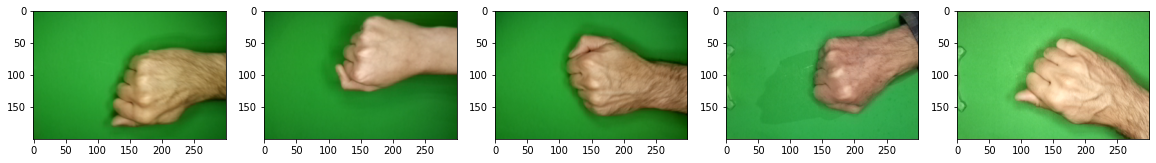

In [0]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_rock_dir, img_path))
    plt.imshow(img)
plt.show()

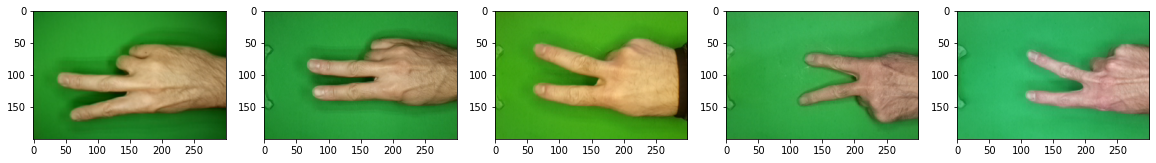

In [0]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_scissors_dir, img_path))
    plt.imshow(img)
plt.show()

## **5. Augmentasi Data Gambar**

Setelah memasukan library model Deep Learning, hal yang harus dilakukan adalah augmentasi data gambar dengan menggunakan metode `**ImageDataGenerator**`. Augmentasi data gambar berguna untuk menambahkan dataset gambar dengan cara memperbesar gambar, memotong gambar, dan memanipulasi gambar tanpa menghilangkan inti dari data tersebut.

In [0]:
train_datagen = ImageDataGenerator(rescale= 1./255, validation_split= 0.5, shear_range = 0.2, zoom_range= 0.2, rotation_range= 20, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.5)

In [0]:
train_generator = train_datagen.flow_from_directory(
            training_dir, 
            target_size=(100,100), 
            batch_size=32, 
            class_mode='categorical',
            shuffle=True
)

valid_generator = validation_datagen.flow_from_directory(
            validation_dir, 
            target_size=(100,100), 
            batch_size=32, 
            class_mode='categorical',
            shuffle=True,
            subset='validation'
)

Found 1749 images belonging to 3 classes.
Found 328 images belonging to 3 classes.


In [0]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [0]:
valid_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [0]:
NUM_TRAIN_DATA = train_generator.n
NUM_VALID_DATA = valid_generator.n

## **6. Melatih sebuah model Convolutional Neural Network**

In [0]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

## **7. Kompilasi Model**

Setelah menggunakan model konvolusi yang berlapis dengan layer Dense, Activation, Flatten, Dropout, dan Maxpool2D. Metode selanjutnya menggunakan model yang akan di-compile. Menentukan model yang akan dikompilasi memiliki banyak pilihan seperti Adam, RMSprop dll. Penggunaan model ini agar menentukan pengoptimalan yang dimiliki oleh model dataset tersebut. Setelah menentukan pengoptimalan model dilanjutkan dengan penggunaan loss pada fungsi CNN dengan kelas dataset yang digunakan. Untuk klasifikasi biner menggunakan **`"binary_crossentropy"`** dan untuk klasifikasi multi kelas menggunakan **`"categorical_crossentropy"`** dan akhirnya menentukan metrik akurasi untuk mengevaluasi model yang dibuat.

In [0]:
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
EPOCHS = 20

In [0]:
history = model.fit(train_generator,
          steps_per_epoch=NUM_TRAIN_DATA // BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
54/54 - 23s - loss: 1.2056 - accuracy: 0.4240 - val_loss: 0.9991 - val_accuracy: 0.4125
Epoch 2/20
54/54 - 23s - loss: 0.6880 - accuracy: 0.7129 - val_loss: 0.5312 - val_accuracy: 0.8687
Epoch 3/20
54/54 - 23s - loss: 0.3671 - accuracy: 0.8690 - val_loss: 0.3547 - val_accuracy: 0.9000
Epoch 4/20
54/54 - 23s - loss: 0.2798 - accuracy: 0.9097 - val_loss: 0.2015 - val_accuracy: 0.9625
Epoch 5/20
54/54 - 22s - loss: 0.2236 - accuracy: 0.9179 - val_loss: 0.2673 - val_accuracy: 0.9250
Epoch 6/20
54/54 - 24s - loss: 0.1972 - accuracy: 0.9342 - val_loss: 0.1398 - val_accuracy: 0.9688
Epoch 7/20
54/54 - 23s - loss: 0.1877 - accuracy: 0.9354 - val_loss: 0.1465 - val_accuracy: 0.9563
Epoch 8/20
54/54 - 23s - loss: 0.1629 - accuracy: 0.9482 - val_loss: 0.1691 - val_accuracy: 0.9375
Epoch 9/20
54/54 - 23s - loss: 0.1507 - accuracy: 0.9534 - val_loss: 0.1092 - val_accuracy: 0.9812
Epoch 10/20
54/54 - 23s - loss: 0.1237 - accuracy: 0.9569 - val_loss: 0.2057 - val_accuracy: 0.9250
Epoch 11/

## **8. Evaluasi Model**

Setelah memasukan Epoch dan Batch Size. Langkah selanjutnya, memasukan evaluasi model dari data train dan valid untuk melihat hasil akurasi dan loss yang digunakan.

In [0]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

55/55 [==============================] - 12s 212ms/step - loss: 0.0477 - accuracy: 0.9840
Loss: 0.0477
Accuracy: 0.9840


In [0]:
score = model.evaluate(valid_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

11/11 [==============================] - 1s 117ms/step - loss: 0.0234 - accuracy: 0.9939
Loss: 0.0234
Accuracy: 0.9939


## **9. Plot Kurva Data Train dan Validasi**

Setelah mendapatkan hasil nilai loss dan akurasi. Kemudian, dilakukan dengan cara menampilkan plot kurva hasil pada data train dan validasi data untuk melihat apakah data sudah pas dengan nilai tersebut atau bisa terjadi overfitting maupun underfitting.

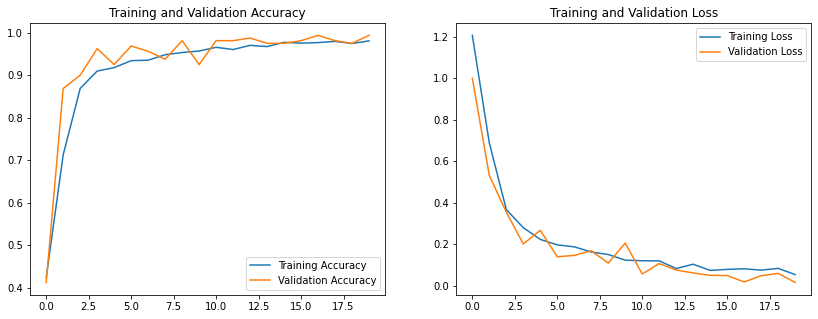

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **10. Confusion Matrix**

Confusion Matrix digunakan untuk mencari performa dalam memprediksi hasil data dengan data aktual.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics

Y_pred = model.predict(valid_generator, NUM_VALID_DATA // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(valid_generator.classes, y_pred)

print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

Confusion Matrix
[[32 35 40]
 [36 38 35]
 [41 34 37]]
True Negative =  32
False Negative =  36
True Positive =  38
False Positive =  35


## **11. Classification Report**

Classification Report digunakan untuk menampilkan Presisi, Recall, dan F1-Score serta nilai Support.

In [0]:
print('Classification Report')
target_names = ['Paper', 'Rock', 'Scissors']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Paper       0.29      0.30      0.30       107
        Rock       0.36      0.35      0.35       109
    Scissors       0.33      0.33      0.33       112

    accuracy                           0.33       328
   macro avg       0.33      0.33      0.33       328
weighted avg       0.33      0.33      0.33       328



## **12. Rekapitulasi Hasil Data**

Setelah mengetahui hasil dari nilai klasifikasi berdasarkan akurasi, loss dan confusion matrix. Maka, gunakan rekapitulasi untuk menampilkan hasil evaluasi model data dengan variansi parameter yang digunakan dan simpan dalam format csv dll.

In [0]:
import pandas as pd

evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Batch_Size': [],
                           'Loss': [],
                           'Accuracy': []
})

r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', train_generator.n, valid_generator.n, EPOCHS, BATCH_SIZE, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Valid,Epochs,Batch_Size,Loss,Accuracy
0,CNN,1749.0,328.0,20.0,32.0,0.023397,0.993902


In [0]:
dict = {"Model" : evaluation.Model, 
        "Data Train" : evaluation.Data_Train, 
        "Data Valid" : evaluation.Data_Valid, 
        "Epochs" : evaluation.Epochs, 
        "Batch Size" : evaluation.Batch_Size, 
        "Loss" : evaluation.Loss, 
        "Accuracy" : evaluation.Accuracy}

df = pd.DataFrame(dict)

df.to_csv(r"drive/My Drive/Project/Data/rockpaperscissors/hasiltest.csv", index=False)

## **13. Prediksi Model Data dengan Upload Gambar**

Setelah mengetahui hasil nilai data tersebut berdasarkan akurasi pada model data. Maka, gunakan **form upload image** dari Google Colab untuk memprediksi model data yang telah di klasifikasi. Apakah data sudah pas atau tidak?

Saving 1yeoLbmp4alVOtFv.png to 1yeoLbmp4alVOtFv.png
1yeoLbmp4alVOtFv.png
Paper


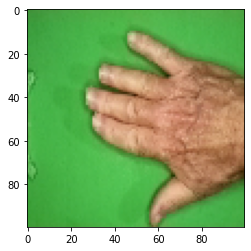

In [0]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # prediksi data gambar
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')